In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
from google.colab import files
uploaded = files.upload()

Saving keras_train_data.xlsx to keras_train_data.xlsx


In [0]:
import io
df = pd.read_excel(io.BytesIO(uploaded['keras_train_data.xlsx']), sep='\t', encoding = 'utf-8')

In [0]:
df = df.sample(frac=1)
df

,Unnamed: 0,EcR::usp,Eip74EF,HHEX,Mad,Su(H),Ubx,br(var.4),cnc::maf-S,denovo_ubx,dl,hb,odd,slbo,Cf2,br,Trl,br(var.2),br(var.3),twi,Bgb::run,Kr,brk,BEAF-32,CG11617,Grain,fkh,gt,D,pan,opa,eve,exd,h,sna,btd,gcm2,nub,ttk,CTCF,pnr,schlank,tll,bap,Dr,sd,usp,B-H1,ovo,labels
68,68,0,0,0,0,0,0,3,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Down
458,2488,0,0,1,0,0,2,1,0,1,0,3,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,up
77,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Down
285,192,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,Not_diff
323,230,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Not_diff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2459,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,up
63,63,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Down
311,218,0,0,0,0,0,1,1,0,0,0,4,1,1,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Not_diff
220,127,1,1,0,0,0,0,1,0,0,0,1,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Not_diff


In [0]:
#A = df_93_counts.iloc[:,1:49]
#B = df_93_counts.iloc[:,49]

A = df.iloc[:,1:49]
B = df.iloc[:,49]

encoder = LabelEncoder()
encoder.fit(B)
encoded_b = encoder.transform(B)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_b = np_utils.to_categorical(encoded_b)




Sparse Logisitic Regression Implementation 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
train1, test1 = train_test_split(df, test_size=0.25)
scaler = StandardScaler()
#train1 = scaler.transform(train1)
#test1 = scaler.transform(test1)

A1 = train1.iloc[:,1:49]
B1 = train1.iloc[:,49]
A2 = test1.iloc[:,1:49]
B2 = test1.iloc[:,49]

#A1 = scaler.fit_transform(A1)
#A2 = scaler.fit_transform(A2)

encoder = LabelEncoder()
encoder.fit(B1)
encoded_b1 = encoder.transform(B1)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_b1 = np_utils.to_categorical(encoded_b1)

In [0]:
A1

,EcR::usp,Eip74EF,HHEX,Mad,Su(H),Ubx,br(var.4),cnc::maf-S,denovo_ubx,dl,hb,odd,slbo,Cf2,br,Trl,br(var.2),br(var.3),twi,Bgb::run,Kr,brk,BEAF-32,CG11617,Grain,fkh,gt,D,pan,opa,eve,exd,h,sna,btd,gcm2,nub,ttk,CTCF,pnr,schlank,tll,bap,Dr,sd,usp,B-H1,ovo
244,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,0,0,0,1,0,0,0,1,1,0,0,0,2,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
125,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0
36,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
366,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver = 'lbfgs')
logit.fit(A1,B1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
target_names = list(df.columns.drop(['labels','sr no']))
target_names

['Bgb::run',
 'CTCF',
 'HHEX',
 'Kr',
 'Ubx',
 'btd',
 'denovo_ubx',
 'eve',
 'hb',
 'sna',
 'bap',
 'D',
 'Mad',
 'br',
 'br(var.3)',
 'h',
 'twi',
 'BEAF-32',
 'Dr',
 'pan',
 'pnr',
 'Cf2',
 'br(var.2)',
 'dl',
 'EcR::usp',
 'Trl',
 'br(var.4)',
 'gcm2',
 'odd',
 'tll',
 'opa',
 'Su(H)',
 'usp',
 'Eip74EF',
 'CG11617',
 'cnc::maf-S',
 'exd',
 'fkh',
 'nub',
 'slbo',
 'B-H1',
 'brk',
 'ovo',
 'Grain',
 'sd',
 'ttk',
 'schlank',
 'gt']

In [0]:
import eli5
eli5.show_weights(logit, feature_names = target_names, target_names=['Down', 'up'], top=50)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight?,Feature
+1.907,eve
+1.376,<BIAS>
+1.001,Ubx
+0.932,CTCF
+0.931,pnr
+0.920,BEAF-32
+0.545,Bgb::run
+0.491,sna
+0.452,exd
+0.395,Kr


Logistic Regression Ends

In [0]:
model = Sequential()
model.add(Dense(43, input_dim=48, activation='relu'))
model.add(Dense(38))
model.add(Dense(33))
model.add(Dense(28))
model.add(Dense(23))
model.add(Dense(18))
model.add(Dense(13))
model.add(Dense(8))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
test = model.fit(A,dummy_b,validation_split=0.25, epochs = 15, batch_size = 5)


Train on 360 samples, validate on 120 samples
Epoch 1/15
360/360 [==============================] - 1s 3ms/step - loss: 1.0960 - acc: 0.4778 - val_loss: 1.0513 - val_acc: 0.5500
Epoch 2/15
360/360 [==============================] - 0s 607us/step - loss: 1.0216 - acc: 0.5278 - val_loss: 1.0626 - val_acc: 0.5250
Epoch 3/15
360/360 [==============================] - 0s 481us/step - loss: 1.0079 - acc: 0.5139 - val_loss: 1.0760 - val_acc: 0.5417
Epoch 4/15
360/360 [==============================] - 0s 443us/step - loss: 0.9347 - acc: 0.5500 - val_loss: 1.1630 - val_acc: 0.4583
Epoch 5/15
360/360 [==============================] - 0s 447us/step - loss: 0.9337 - acc: 0.5583 - val_loss: 1.1890 - val_acc: 0.4167
Epoch 6/15
360/360 [==============================] - 0s 397us/step - loss: 0.8695 - acc: 0.6417 - val_loss: 1.2000 - val_acc: 0.4917
Epoch 7/15
360/360 [==============================] - 0s 389us/step - loss: 0.8528 - acc: 0.6222 - val_loss: 1.3164 - val_acc: 0.4583
Epoch 8/15
360/360

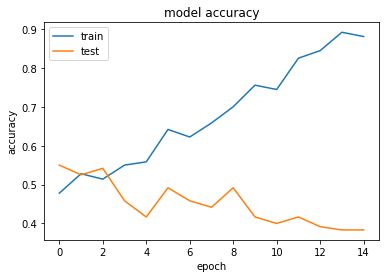

In [0]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(test.history['acc'])
plt.plot(test.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

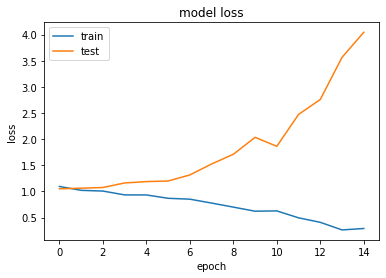

In [0]:
# summarize history for loss
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
ynew = model.predict(A2)
dff = pd.DataFrame(ynew)
dff.rename(columns={0:'Down',1:'Not_diff',2:'up'}, inplace=True)
result = dff.idxmax(axis=1)

In [0]:
print(confusion_matrix(B2, result))
print(classification_report(B2, result))

[[15  4  3]
 [ 3 52  5]
 [ 1 10 27]]
              precision    recall  f1-score   support

        Down       0.79      0.68      0.73        22
    Not_diff       0.79      0.87      0.83        60
          up       0.77      0.71      0.74        38

    accuracy                           0.78       120
   macro avg       0.78      0.75      0.77       120
weighted avg       0.78      0.78      0.78       120



In [0]:
df_down = df.iloc[0:93,]
df_not_diff = df.iloc[93:351,].sample(n=93)
df_up = df.iloc[351:480,].sample(n=93)
df_93_counts = pd.concat([df_down, df_not_diff, df_up]).sample(frac=1)
df_93_counts

,sr no,Bgb::run,CTCF,HHEX,Kr,Ubx,btd,denovo_ubx,eve,hb,sna,bap,D,Mad,br,br(var.3),h,twi,BEAF-32,Dr,pan,pnr,Cf2,br(var.2),dl,EcR::usp,Trl,br(var.4),gcm2,odd,tll,opa,Su(H),usp,Eip74EF,CG11617,cnc::maf-S,exd,fkh,nub,slbo,B-H1,brk,ovo,Grain,sd,ttk,schlank,gt,labels
298,299,0,0,0,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,Not_diff
379,380,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,up
28,29,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Down
451,452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,up
22,23,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,401,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,up
370,371,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,up
23,24,1,0,0,0,0,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,Down
42,43,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Down
